# Steps:
1.import the necessary libraries

2.import the dataset

3.Handling null values

4.outlier detection---surya

5.Seperate Dependent and independent variables

6.Encoding

7.splitting into training and testing set

8.Feature scaling


## 1.import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.import the dataset

In [2]:
#.csv  .tsv ,json,.excel
dataset=pd.read_csv("Churn_Modelling.csv")
#dataset=pd.read_csv(r"D:\SmartBridge\VIT_morning_slot\Churn_Modelling.csv")

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
dataset.shape

(10000, 14)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
mean=sum of all the observations/total no.of observations

std

SyntaxError: invalid syntax (<ipython-input-9-3496e67e88bb>, line 1)

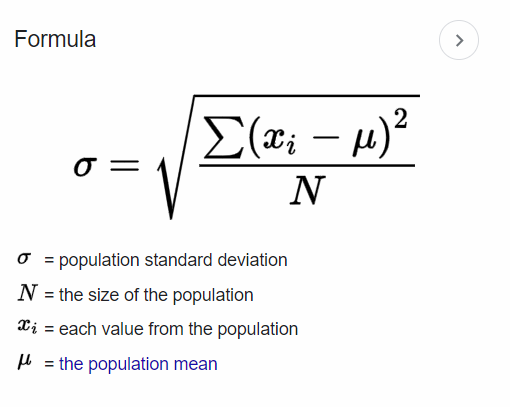# 

In [ ]:
exited- dependent variable--output

inputs--independent variables

In [9]:
corr=dataset.corr()
corr

C:\Users\Tulasi\AppData\Local\Temp\ipykernel_10080\1091080309.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

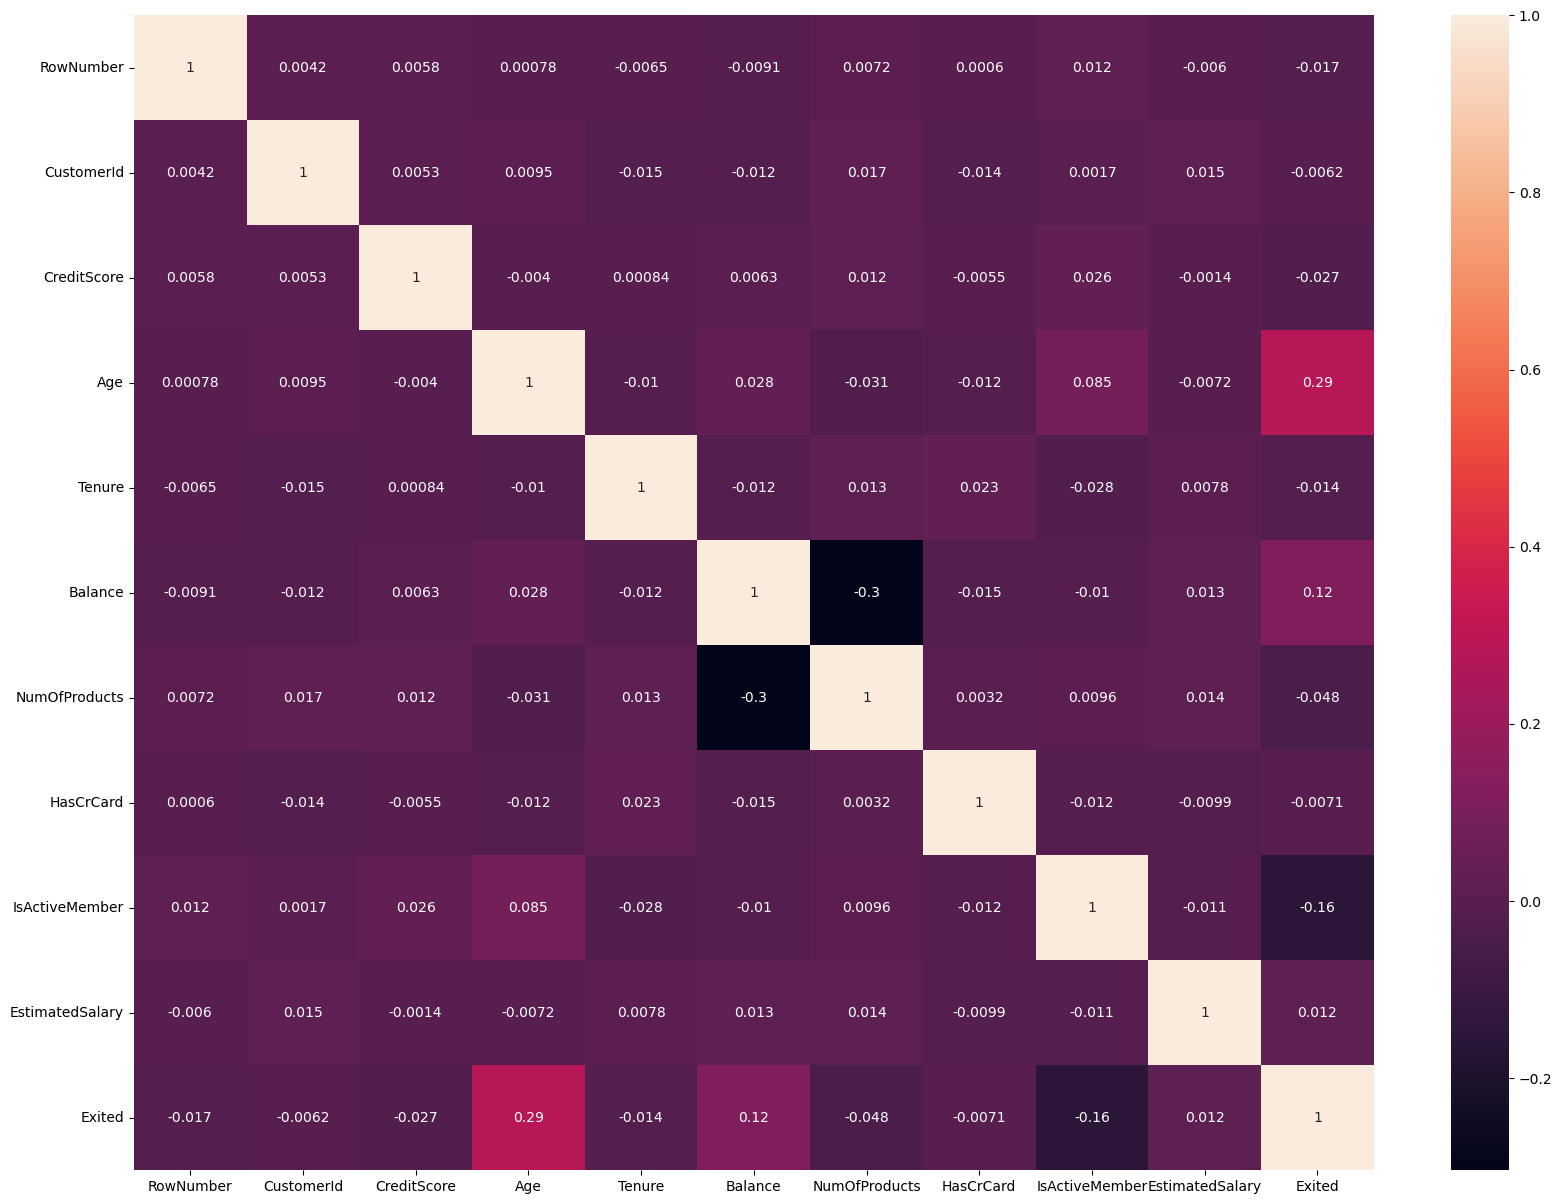

In [10]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [11]:
dataset.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
dataset.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
dataset.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

## 3.Handling null values

In [ ]:
1.delete the null values
2.delete row/column
3.Replace with mean median or mode

In [15]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [16]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
in our dataset there are no null values ,Therefore there is no need to handle null values 
For Example let us assume there are null values in age and gender column

In [17]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 4.outliers

<Axes: >

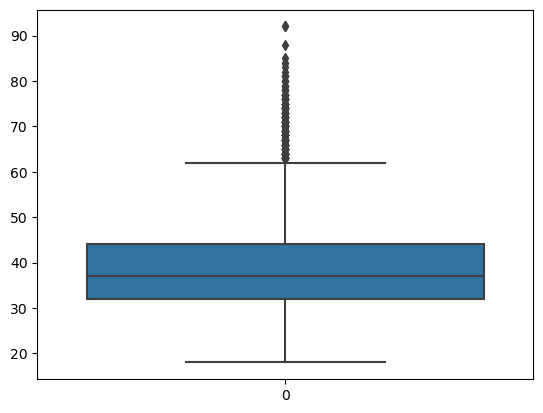

In [18]:
sns.boxplot(dataset.Age)

## 5.Seperate dependent  and independent variables

In [19]:
#datset.iloc[rows,column]
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13:14]

In [24]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [20]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [21]:
dataset.shape

(10000, 14)

In [22]:
x.shape

(10000, 10)

In [23]:
y.shape

(10000, 1)

## 6.Encoding

In [ ]:
1.nominal===not worried about arrangement of the data

Gender   male    female ------label encoding can be performed

state   ap telangana bhopal chennai


a.one hot encoding
b.one hot encoding ith many categorical variables
c.mean encoding

2.ordinal---take care about rank of the data

education    salary
Btech         3
mtech         2
phd           1


a.label encoding
b.Target guided ordinal encoding

### Label encoding on Gender column

In [ ]:
apple banana grpes oranges(0-3)
0    1     2    3

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [26]:
x["Gender"]=le.fit_transform(x["Gender"])

In [27]:
print(le.classes_)

['Female' 'Male']


In [28]:
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [29]:
mapping

{'Female': 0, 'Male': 1}

In [30]:
x["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int32

In [31]:
x["Gender"].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [32]:
x["Gender"].nunique()

2

In [33]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [34]:
x.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### One hot encoding on geography column

In [ ]:
Geography     France     Germany    Spain
France           1          0         0
Germany          0          1         0
Spain            0          0          1


100 categories  99

99 columns will be added----curse of dimensionality

In [35]:
x.shape

(10000, 10)

In [36]:
geography=pd.get_dummies(x["Geography"],drop_first=True)

In [37]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [38]:
#concat
x=pd.concat([x,geography],axis=1)

In [39]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,1


In [40]:
#drop geography column
x.drop(["Geography"],axis=1,inplace=True)

In [41]:
x.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1
5,645,1,44,8,113755.78,2,1,0,149756.71,0,1
6,822,1,50,7,0.00,2,1,1,10062.80,0,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0
8,501,1,44,4,142051.07,2,0,1,74940.50,0,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,0


In [42]:
x.shape

(10000, 11)

### 7.splitting into training and testing set

In [43]:
100  rows
Training data 70-80 
Test data  20-30

performance   new values

SyntaxError: invalid syntax (2561487028.py, line 1)

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [45]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7000, 11), (3000, 11), (7000, 1), (3000, 1))

In [46]:
a=[1,2,3,4,5,6]
b=[1,0,1,5,6,3]

for i in range(5):
    a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3,random_state=100)
    print("with random state",a_train)
    

with random state [5, 4, 6, 1]
with random state [5, 4, 6, 1]
with random state [5, 4, 6, 1]
with random state [5, 4, 6, 1]
with random state [5, 4, 6, 1]


In [47]:
a=[1,2,3,4,5,6]    # 4 values for training and 2 for testing
b=[1,0,1,5,6,3]

for i in range(5):
    a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3)
    print("without random state",a_train)
    

without random state [3, 1, 2, 4]
without random state [3, 1, 5, 6]
without random state [2, 1, 6, 4]
without random state [6, 2, 5, 1]
without random state [1, 5, 4, 6]


### 8.Feature Scaling

In [ ]:
Height  180cms
Weight   45kgs


Standard scaling   mean =0 and sd =1
min max scaling    0 to 1 

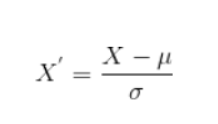

In [ ]:
X_scaled==42-38/10

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [49]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [50]:
x_train

array([[-0.09792126,  0.92295821, -0.55759842, ..., -0.76862426,
        -0.56987189, -0.5731713 ],
       [-1.12612023,  0.92295821,  0.01725942, ..., -1.39359887,
        -0.56987189, -0.5731713 ],
       [-0.62230274, -1.08347268,  3.5622161 , ..., -1.49739308,
        -0.56987189, -0.5731713 ],
       ...,
       [ 0.89943174,  0.92295821, -0.36597914, ...,  1.41400417,
        -0.56987189, -0.5731713 ],
       [-0.62230274, -1.08347268, -0.07855022, ...,  0.84625811,
        -0.56987189,  1.74467913],
       [-0.28299708, -1.08347268,  0.87954618, ...,  0.32689267,
         1.75478035, -0.5731713 ]])

In [52]:
x_train.shape

(7000, 11)

# ANN Starts

## 1.import the libraires 

In [51]:
from keras.models import Sequential
from keras.layers import Dense

In [53]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [54]:
#initialise the model
model=Sequential()

### 2.add input layer 
(inputs==n=no.of inputs in your dataset,weights="random",activation function=relu)

In [55]:
model.add(Dense(units=11,activation="relu",kernel_initializer="random_uniform"))

### 3.add hidden layer
(inputs=2n  or n/2,weights,activation function="relu")

In [56]:
model.add(Dense(units=6,activation="relu",kernel_initializer="random_uniform"))

In [57]:
model.add(Dense(units=6,activation="relu",kernel_initializer="random_uniform"))

### 4. add output layer
(no.of outputs=based on your dataset,weights,activation fucntion)
		regression----relu
		binary classsification---  sigmoid
		categorical classification--sofmax	

In [58]:
#(no.of outputs=based on your dataset,weights,activation fucntion) 
model.add(Dense(units=1,activation="sigmoid",kernel_initializer="random_uniform"))

### 5.configure the learning process
(loss fucntion,accuracy,optimizer)
			Regression--(MSE,MSE, adam/gd/sgd/mgd/adagrad)
			binary classification--(binary cross entropy,accuracy score,adam/gd/sgd/mgd/adagrad)
			categorical-----(categorical cross entropy,accuracy,adam/gd/sgd/mgd/adagrad)

In [61]:
#(loss fucntion,accuracy,optimizer)
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

### 6.fit the model on training data
(x_train,y_train,batch_size,epochs)

In [62]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
219/219 [==============================] - 7s 8ms/step - loss: 0.5806 - accuracy: 0.7977
Epoch 2/100
219/219 [==============================] - 2s 9ms/step - loss: 0.4289 - accuracy: 0.7977
Epoch 3/100
219/219 [==============================] - 2s 10ms/step - loss: 0.4183 - accuracy: 0.7977
Epoch 4/100
219/219 [==============================] - 3s 13ms/step - loss: 0.4123 - accuracy: 0.7977
Epoch 5/100
219/219 [==============================] - 3s 16ms/step - loss: 0.4062 - accuracy: 0.7977
Epoch 6/100
219/219 [==============================] - 3s 12ms/step - loss: 0.4001 - accuracy: 0.7977
Epoch 7/100
219/219 [==============================] - 2s 8ms/step - loss: 0.3942 - accuracy: 0.8216
Epoch 8/100
219/219 [==============================] - 2s 7ms/step - loss: 0.3889 - accuracy: 0.8311
Epoch 9/100
219/219 [==============================] - 2s 9ms/step - loss: 0.3847 - accuracy: 0.8299
Epoch 10/100
219/219 [==============================] - 2s 7ms/step - loss: 0.3812 - ac

219/219 [==============================] - 1s 4ms/step - loss: 0.3373 - accuracy: 0.8640
Epoch 82/100
219/219 [==============================] - 1s 4ms/step - loss: 0.3379 - accuracy: 0.8634
Epoch 83/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3365 - accuracy: 0.8646
Epoch 84/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3366 - accuracy: 0.8644
Epoch 85/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3374 - accuracy: 0.8637
Epoch 86/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3377 - accuracy: 0.8626
Epoch 87/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3363 - accuracy: 0.8633
Epoch 88/100
219/219 [==============================] - 1s 4ms/step - loss: 0.3359 - accuracy: 0.8621
Epoch 89/100
219/219 [==============================] - 1s 5ms/step - loss: 0.3363 - accuracy: 0.8631
Epoch 90/100
219/219 [==============================] - 1s 5ms/step - loss: 0.3364 - accuracy: 

In [ ]:
x_train=(7000)   ====32 batchs
 7000/32===219
    
    each batch 219 records


In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 6)                 72        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 253 (1012.00 Byte)
Trainable params: 253 (1012.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
input*(previous op+1)==parameter
 dense (Dense)======11*(11+1)  ======132 
dense_1 (Dense) ===  6*(11+1)  =72 
 dense_2 (Dense) ===6*(6+1)=42
    

In [ ]:
4. prediction
5.finding accuracy
6.save the model
7.random value prediction

### 4. prediction

In [64]:
ypred=model.predict(x_test)
ypred

94/94 [==============================] - 1s 8ms/step


array([[0.22993843],
       [0.39269465],
       [0.08439742],
       ...,
       [0.04627782],
       [0.01698859],
       [0.7167669 ]], dtype=float32)

In [65]:
y_test

,Exited
9394,0
898,1
2398,0
5906,0
2343,0
...,...
4004,0
7375,0
9307,0
8394,0


In [ ]:
 Sigmoid=0 to 1
ypred>0.5  1
ypred<0.5  0


In [66]:
ypred = np.where(ypred >0.5 ,1 , 0)
ypred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [67]:
y_test

,Exited
9394,0
898,1
2398,0
5906,0
2343,0
...,...
4004,0
7375,0
9307,0
8394,0


### accuracy

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.8563333333333333

### random value prediction

In [69]:
x.head(1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,0,42,2,0.0,1,1,1,101348.88,0,0


In [72]:
model.predict(sc.transform([[619,0,42,2,0.0,1,1,1,101348.88,0,0]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step


array([[0.47291154]], dtype=float32)

In [74]:
sc.transform([[619,0,42,2,0.0,1,1,1,101348.88,0,0]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.33126995, -1.12586575,  0.26798041, -1.05456264, -1.28995572,
        -0.87153075,  0.65569297,  0.97823676,  0.01985729, -0.59942579,
        -0.57529746]])

In [73]:
model.save("ann.h5")

C:\Users\Tulasi\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
